<a href="https://colab.research.google.com/github/jiku100/2020-2-machine-running-proejct/blob/master/assignment8/%EC%8B%A0%EC%84%9D%EA%B2%BD_assignment_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PCA**



# 1. Load Data
<hr>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

data = np.loadtxt('data-pca.txt', delimiter=',')

x = data[:,0]
y = data[:,1]
z = data
print(f"X shape = {x.shape}")
print(f"Y shape = {y.shape}")
print(f"Z shape = {z.shape}")

X shape = (50,)
Y shape = (50,)
Z shape = (50, 2)


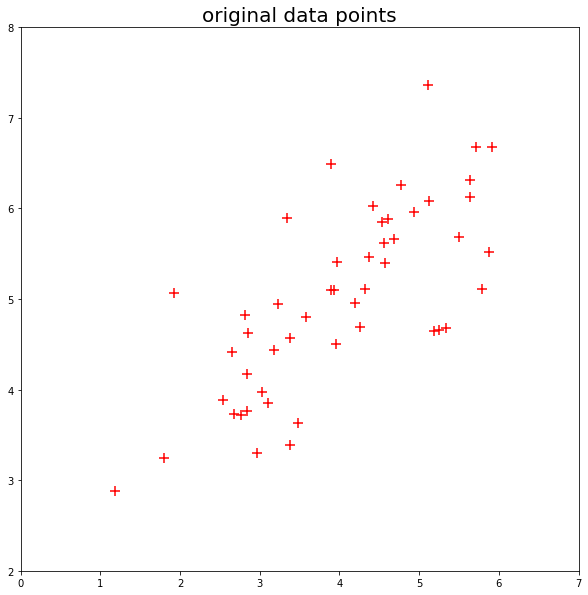

In [2]:
plt.figure(figsize=(10,10))
plt.scatter(x,y, marker = "+", s = 100, c="r")
plt.title("original data points", fontsize = 20)
plt.xlim([0, 7])
plt.ylim([2, 8])
plt.show()

# 2. Normalize Data
<hr>

In [3]:
def normalize_data(x, y):

    xn = (x - np.mean(x))/np.std(x)
    yn = (y - np.mean(y))/np.std(y)

    return xn, yn

In [4]:
x_normalize, y_normalize = normalize_data(x,y)

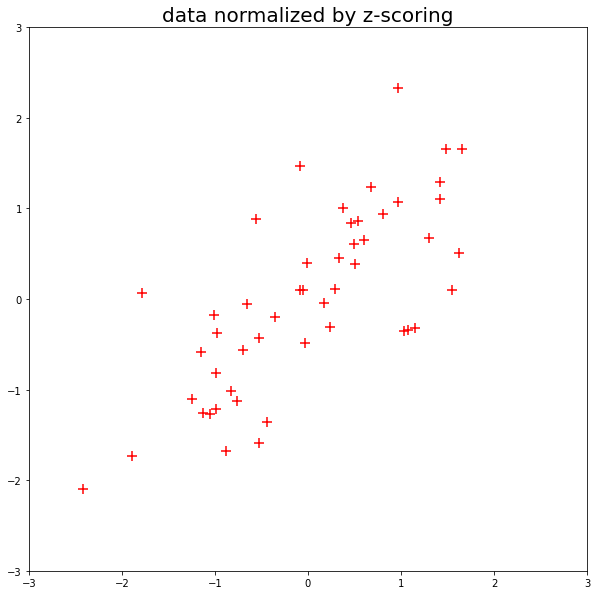

In [5]:
plt.figure(figsize=(10,10))
plt.scatter(x_normalize,y_normalize, marker = "+", s = 100, c="r")
plt.title("data normalized by z-scoring", fontsize = 20)
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.show()

## 3. Find Principal Direction
<hr>

In [6]:
z_normalize = np.vstack([x_normalize, y_normalize]).T
print(z_normalize.shape)

(50, 2)


In [7]:
print(x_normalize[:5])

[-0.5233151   0.46381907 -1.14839444 -1.0540573  -0.98402134]


In [8]:
print(z_normalize[:5])

[[-0.5233151  -1.59279489]
 [ 0.46381907  0.84034673]
 [-1.14839444 -0.58316356]
 [-1.0540573  -1.27072124]
 [-0.98402134 -0.8165806 ]]


In [9]:
def compute_covariance(Z):

    covar = np.cov(Z.T)# compute the covariance matrix #
    ## 실제 수식으로 구해보았지만, numpy의 소숫점 정확도가 더 정확해 numpy를 선택
    return covar
  
def compute_principal_direction(covariance):

    eigenvalues, eigenvectors = np.linalg.eig(covariance)
    eigenvectors = eigenvectors.T
    idx = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[idx]
    
    return eigenvalues, eigenvectors, idx
#idx는 eigenvalue가 큰 순서부터의 index를 가짐

In [10]:
## co variance matrix 구하기
cov = compute_covariance(z_normalize)
print(cov)
print(cov.shape)

[[1.02040816 0.75054082]
 [0.75054082 1.02040816]]
(2, 2)


In [11]:
## eigenvector, eigenvalue 구하기
eigenvalues, eigenvectors, eigen_order = compute_principal_direction(cov)
print(eigenvalues.shape)
print(eigenvectors.shape)
print(eigenvalues)
print(eigenvectors)
print(eigen_order)

(2,)
(2, 2)
[1.77094898 0.26986734]
[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]
[0 1]


In [12]:
## vector를 그릴 점 구하기
x_vector_1 = eigenvectors[eigen_order[0]][0]  ## eigenvalue가 큰 값부터
y_vector_1 = eigenvectors[eigen_order[0]][1]
x_vector_2 = eigenvectors[eigen_order[1]][0]
y_vector_2 = eigenvectors[eigen_order[1]][1]

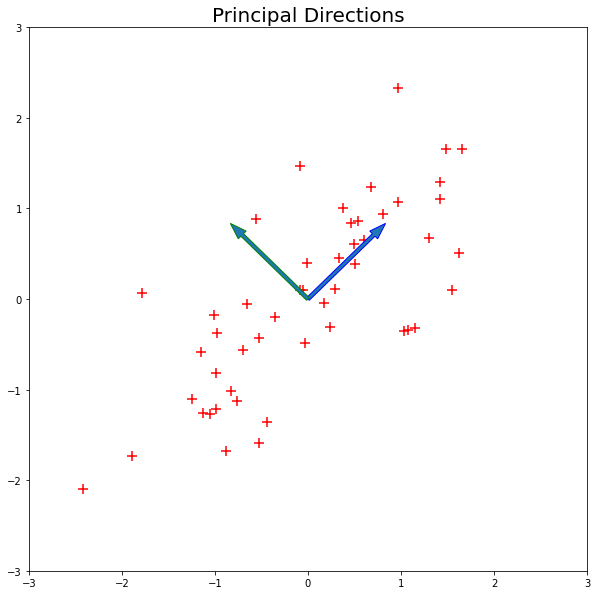

In [13]:
plt.figure(figsize=(10,10))
plt.scatter(x_normalize,y_normalize, marker = "+", s = 100, c="r")
plt.arrow(0, 0, x_vector_1, y_vector_1, width = 0.04, ec='blue')
plt.arrow(0, 0, x_vector_2, y_vector_2, width = 0.04, ec='green')
plt.title("Principal Directions", fontsize = 20)
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.show()

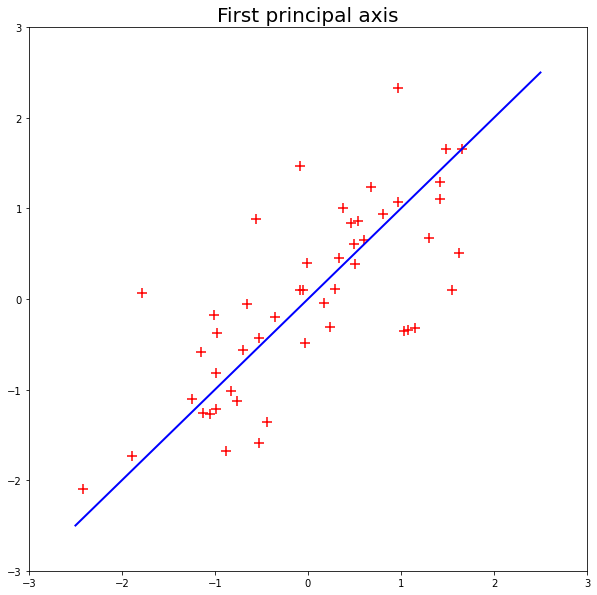

In [14]:
x_test_1 = np.linspace(-2.5,2.5)
y_test_1 = eigenvectors[eigen_order[0]][1]/eigenvectors[eigen_order[0]][0] * x_test_1
plt.figure(figsize=(10,10))
plt.scatter(x_normalize,y_normalize, marker = "+", s = 100, c="r")
plt.plot(x_test_1,y_test_1, linewidth=2, c='b')
plt.title("First principal axis", fontsize = 20)
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.show()

In [15]:
def compute_projection(point, axis):

    projection = np.dot(point, axis)/(np.sqrt(sum(axis**2))**2) * axis# compute the projection of point on the axis #
    
    return projection


In [16]:
a = np.array([0.5,2])
b = np.array([1, 0])
c = compute_projection(a, b)
print(c)

[0.5 0. ]


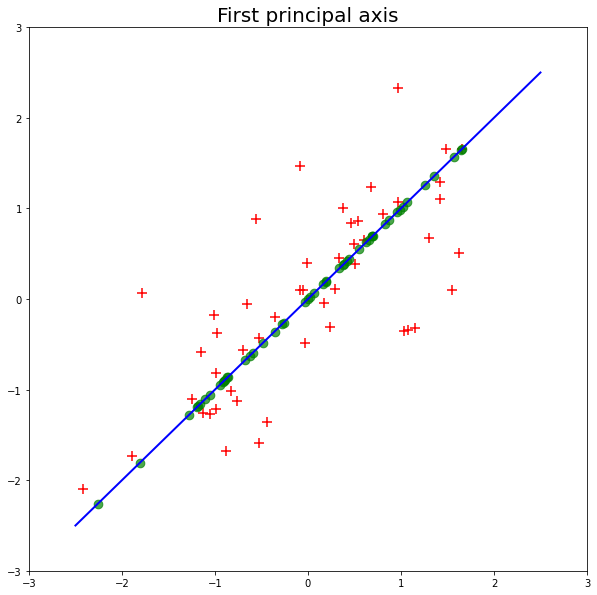

In [17]:
axis_1 = eigenvectors[eigen_order[0]]
plt.figure(figsize=(10,10))
plt.scatter(x_normalize,y_normalize, marker = "+", s = 100, c="r")
plt.plot(x_test_1,y_test_1, linewidth=2, c='b')
for point in z_normalize:
  projection = compute_projection(point, axis_1)
  plt.scatter(projection[0], projection[1], s = 75, c='g', alpha = 0.7)
plt.title("First principal axis", fontsize = 20)
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.show()

In [18]:
def compute_distance(point1, point2):

    distance = np.sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)
    
    return distance


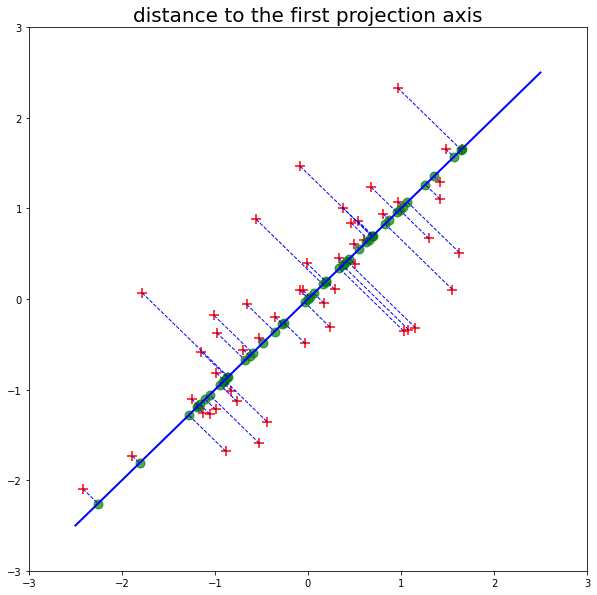

In [19]:
plt.figure(figsize=(10,10))
plt.scatter(x_normalize,y_normalize, marker = "+", s = 100, c="r")
plt.plot(x_test_1,y_test_1, linewidth=2, c='b')
for point in z_normalize:
  projection = compute_projection(point, axis_1)
  plt.scatter(projection[0], projection[1], s = 80, c='g', alpha = 0.7)
  plt.plot([point[0], projection[0]], [point[1], projection[1]], linestyle = '--', c='b', linewidth = 1)
plt.title("distance to the first projection axis", fontsize = 20)
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.show()

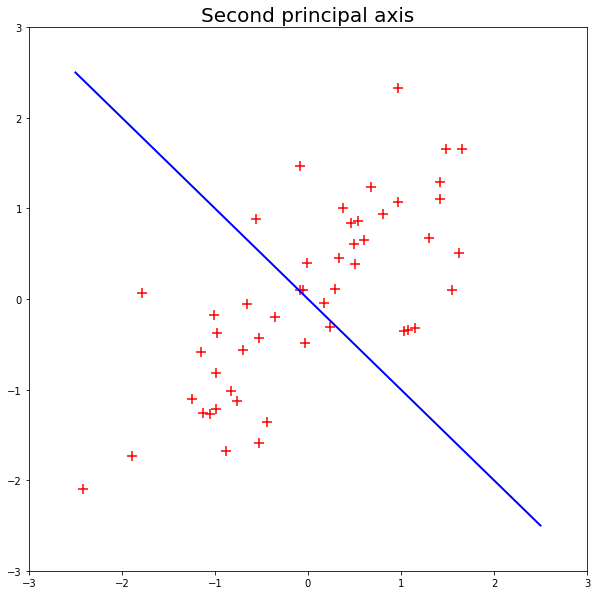

In [20]:
x_test_2 = np.linspace(-2.5,2.5)
y_test_2 = eigenvectors[eigen_order[1]][1]/eigenvectors[eigen_order[1]][0] * x_test_2
plt.figure(figsize=(10,10))
plt.scatter(x_normalize,y_normalize, marker = "+", s = 100, c="r")
plt.plot(x_test_2,y_test_2, linewidth=2, c='b')
plt.title("Second principal axis", fontsize = 20)
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.show()

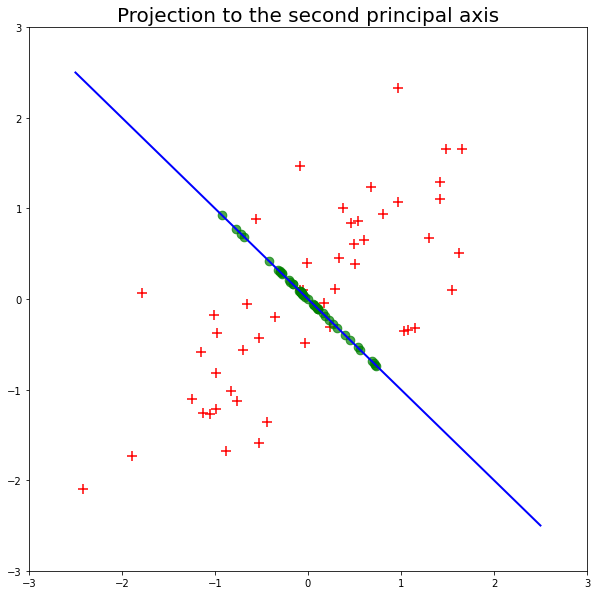

In [21]:
axis_2 = eigenvectors[eigen_order[1]]
plt.figure(figsize=(10,10))
plt.scatter(x_normalize,y_normalize, marker = "+", s = 100, c="r")
plt.plot(x_test_2,y_test_2, linewidth=2, c='b')
for point in z_normalize:
  projection = compute_projection(point, axis_2)
  plt.scatter(projection[0], projection[1], s = 75, c='g', alpha = 0.7)
plt.title("Projection to the second principal axis", fontsize = 20)
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.show()

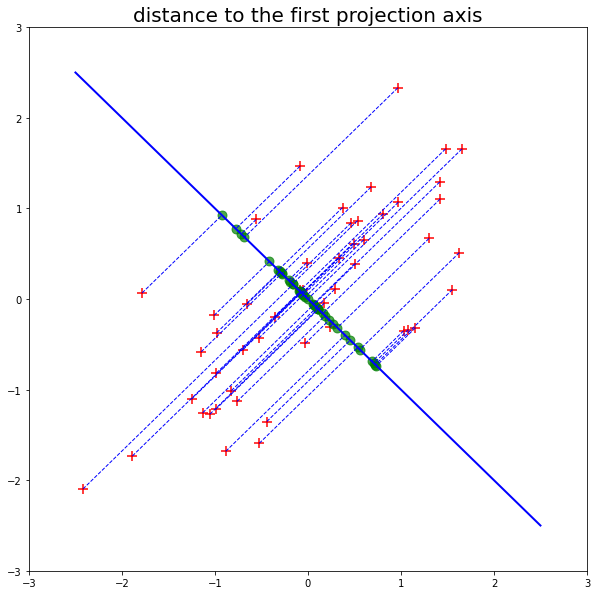

In [22]:
plt.figure(figsize=(10,10))
plt.scatter(x_normalize,y_normalize, marker = "+", s = 100, c="r")
plt.plot(x_test_2,y_test_2, linewidth=2, c='b')
for point in z_normalize:
  projection = compute_projection(point, axis_2)
  plt.scatter(projection[0], projection[1], s = 80, c='g', alpha = 0.7)
  plt.plot([point[0], projection[0]], [point[1], projection[1]], linestyle = '--', c='b', linewidth = 1)
plt.title("distance to the first projection axis", fontsize = 20)
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.show()

## 4. Output
<hr>

## 1. Plot the original data points

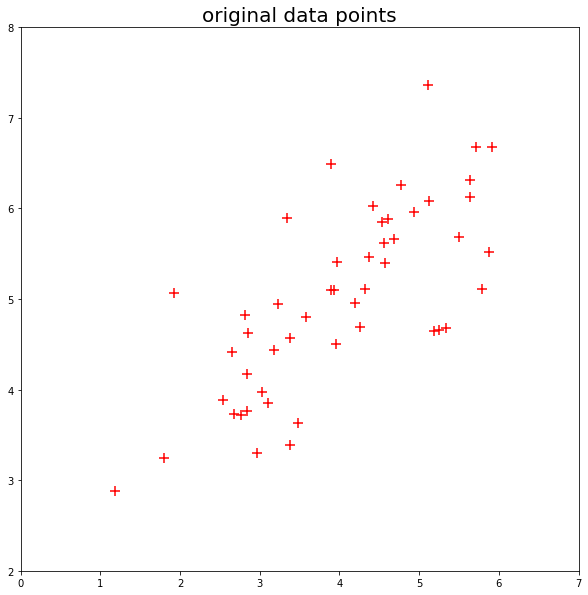

In [23]:
plt.figure(figsize=(10,10))
plt.scatter(x,y, marker = "+", s = 100, c="r")
plt.title("original data points", fontsize = 20)
plt.xlim([0, 7])
plt.ylim([2, 8])
plt.show()

## 2. Plot the normalized data points

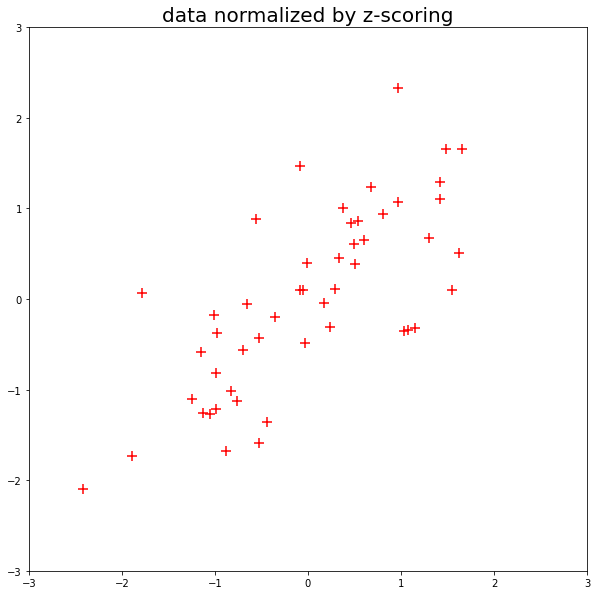

In [24]:
plt.figure(figsize=(10,10))
plt.scatter(x_normalize,y_normalize, marker = "+", s = 100, c="r")
plt.title("data normalized by z-scoring", fontsize = 20)
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.show()

## 3, Plot the principal axes

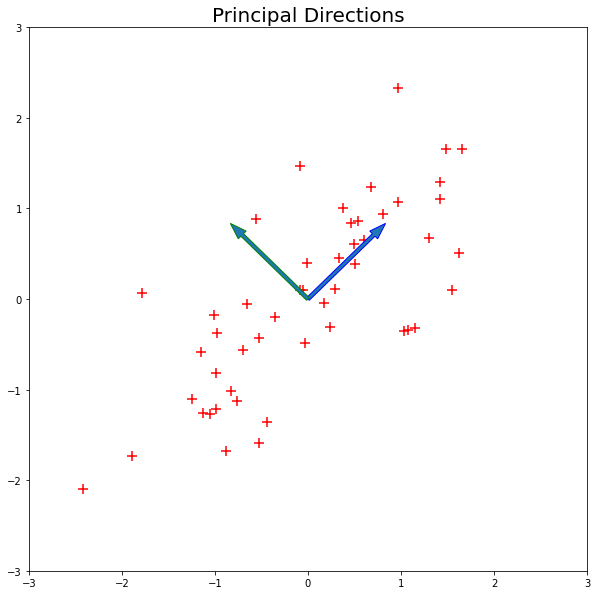

In [25]:
plt.figure(figsize=(10,10))
plt.scatter(x_normalize,y_normalize, marker = "+", s = 100, c="r")
plt.arrow(0, 0, x_vector_1, y_vector_1, width = 0.04, ec='blue')
plt.arrow(0, 0, x_vector_2, y_vector_2, width = 0.04, ec='green')
plt.title("Principal Directions", fontsize = 20)
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.show()

## 4. Plot the first principal axis

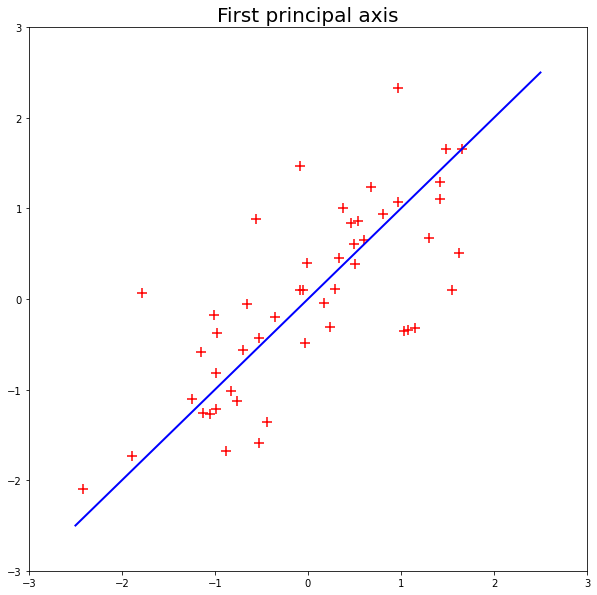

In [26]:
plt.figure(figsize=(10,10))
plt.scatter(x_normalize,y_normalize, marker = "+", s = 100, c="r")
plt.plot(x_test_1,y_test_1, linewidth=2, c='b')
plt.title("First principal axis", fontsize = 20)
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.show()

## 5. Plot the project of the normalized data points onto the first principal axis

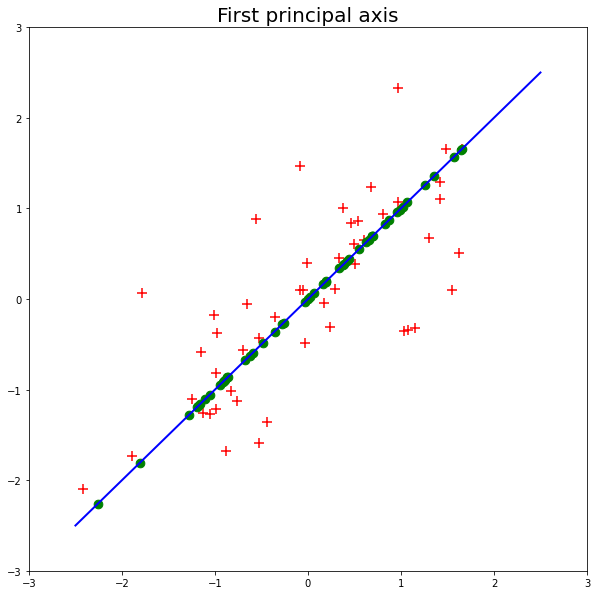

In [27]:
axis_1 = eigenvectors[eigen_order[0]]
plt.figure(figsize=(10,10))
plt.scatter(x_normalize,y_normalize, marker = "+", s = 100, c="r")
plt.plot(x_test_1,y_test_1, linewidth=2, c='b')
for point in z_normalize:
  projection = compute_projection(point, axis_1)
  plt.scatter(projection[0], projection[1], s = 75, c='g')
plt.title("First principal axis", fontsize = 20)
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.show()

## 6. Plot the lines between the normalized data points and their projection points on the first principal axis

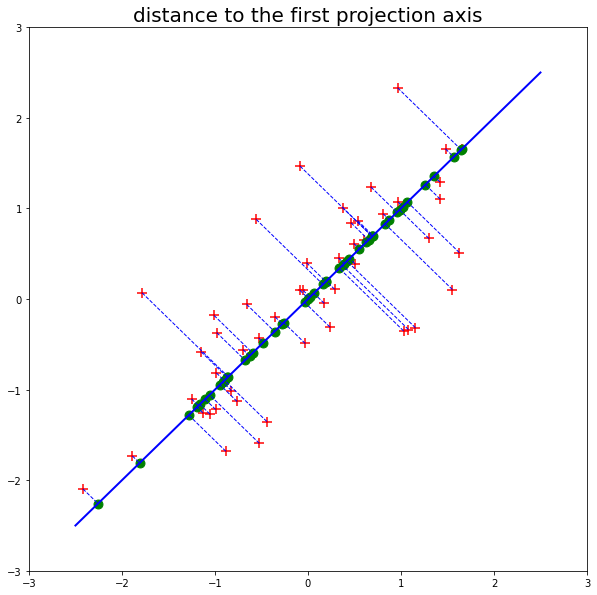

In [28]:
plt.figure(figsize=(10,10))
plt.scatter(x_normalize,y_normalize, marker = "+", s = 100, c="r")
plt.plot(x_test_1,y_test_1, linewidth=2, c='b')
for point in z_normalize:
  projection = compute_projection(point, axis_1)
  plt.scatter(projection[0], projection[1], s = 80, c='g')
  plt.plot([point[0], projection[0]], [point[1], projection[1]], linestyle = '--', c='b', linewidth = 1)
plt.title("distance to the first projection axis", fontsize = 20)
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.show()

## 7. Plot the second principal axis

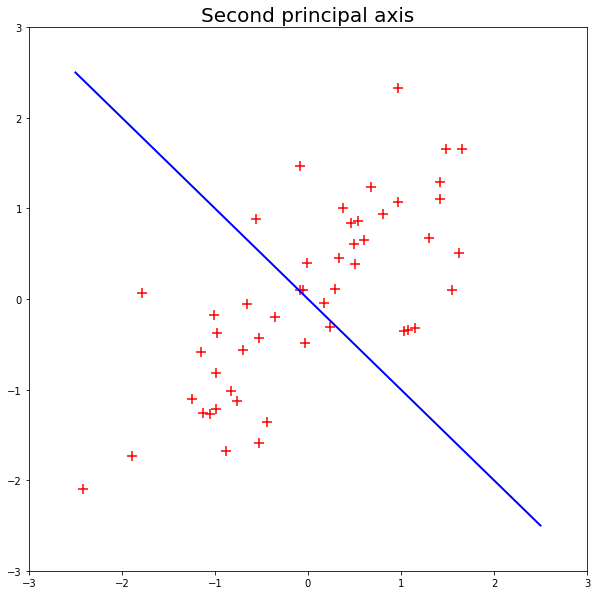

In [29]:
x_test_2 = np.linspace(-2.5,2.5)
y_test_2 = eigenvectors[eigen_order[1]][1]/eigenvectors[eigen_order[1]][0] * x_test_2
plt.figure(figsize=(10,10))
plt.scatter(x_normalize,y_normalize, marker = "+", s = 100, c="r")
plt.plot(x_test_2,y_test_2, linewidth=2, c='b')
plt.title("Second principal axis", fontsize = 20)
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.show()

## 8. Plot the project of the normalized data points onto the second principal axis

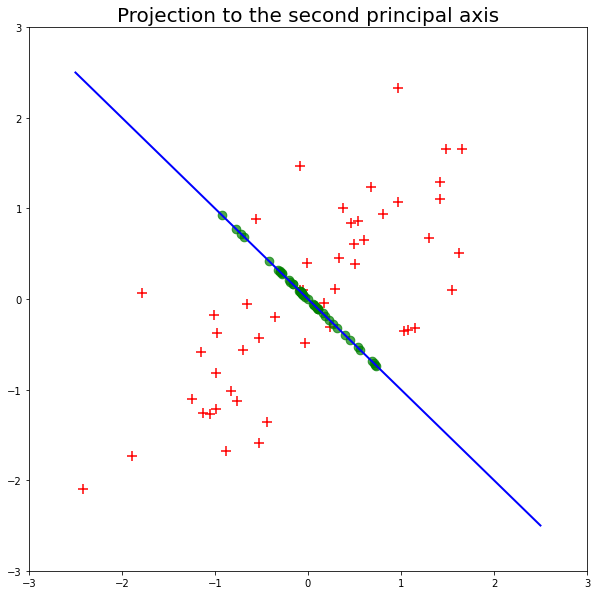

In [30]:
axis_2 = eigenvectors[eigen_order[1]]
plt.figure(figsize=(10,10))
plt.scatter(x_normalize,y_normalize, marker = "+", s = 100, c="r")
plt.plot(x_test_2,y_test_2, linewidth=2, c='b')
for point in z_normalize:
  projection = compute_projection(point, axis_2)
  plt.scatter(projection[0], projection[1], s = 75, c='g', alpha = 0.7)
plt.title("Projection to the second principal axis", fontsize = 20)
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.show()

## 9. Plot the lines between the normalized data points and their projection points on the second principal axis

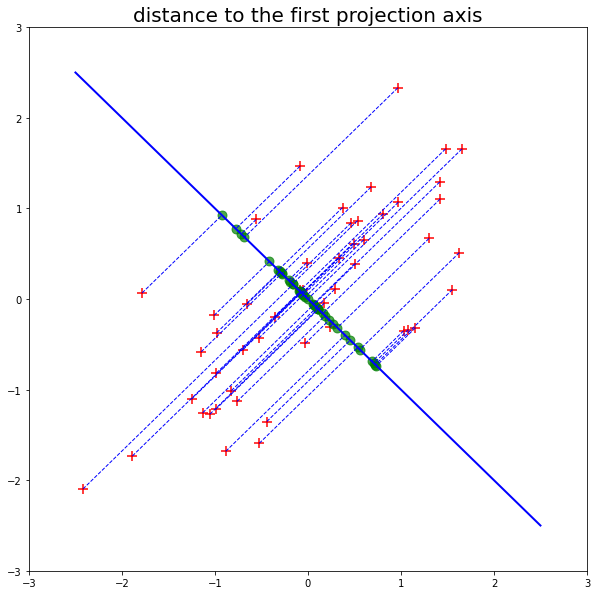

In [31]:
plt.figure(figsize=(10,10))
plt.scatter(x_normalize,y_normalize, marker = "+", s = 100, c="r")
plt.plot(x_test_2,y_test_2, linewidth=2, c='b')
for point in z_normalize:
  projection = compute_projection(point, axis_2)
  plt.scatter(projection[0], projection[1], s = 80, c='g', alpha = 0.7)
  plt.plot([point[0], projection[0]], [point[1], projection[1]], linestyle = '--', c='b', linewidth = 1)
plt.title("distance to the first projection axis", fontsize = 20)
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.show()